### 載入套件與讀取資料

載入套件

In [1]:
import pandas as pd


讀取資料集檔案[線上零售資料集](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

In [2]:
df = pd.read_excel('Online Retail.xlsx')

### 資料的資訊

讀取的資料大小

In [ ]:
df.shape

541909列(rows，紀錄)，8行(columns，欄位)

資料的欄位名稱

In [3]:
df.info()

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

這是一個交易發票的檔案，包含發票編號(InvoiceNo)、貨品編號(StockCode)、描述(Description)、數量(Quantity)、發票日期(InvoiceDate)、單價(UnitPrice)、顧客識別號(CustomerID)、國別(Country)等變數欄位。

數值類型的欄位資料的統計描述情形

In [ ]:
df.describe()

### 資料的內容

前五筆資料

In [ ]:
df[:5]

後五筆資料

In [ ]:
df[-5:]

### 遺失資料處理

列出CustomerID沒有資料的紀錄

In [ ]:
df[pd.isna(df.CustomerID)]

去除CustomerID沒有資料的紀錄

In [4]:
df = df.dropna(subset=['CustomerID'])

確認是否去除成功

In [ ]:
df[pd.isna(df.CustomerID)]

### 多餘資料處理

為了處理時間資料，載入datetime套件

In [5]:
from datetime import datetime
from datetime import date

查看發票日期(InvoiceDate)

In [ ]:
print('最後日期', max(df.InvoiceDate), '最前日期', min(df.InvoiceDate))


發票日期在2010-12-01到2011-12-09間，稍微超過一年，為了方便計算起見，取2010-12-09到2011-12-09之間的資料

In [6]:
df = df[df.InvoiceDate>=datetime(2010, 12, 9, 0, 0, 0)]

### 特殊資料處理

查看數量(Quantity)為負或0的情形


In [ ]:
df[df.Quantity<=0]

當Quantity<=0時，該筆交易為取消，InvoiceNo的首字為C

查看單價(UnitPrice)為負或0的情形

In [ ]:
df[df.UnitPrice<=0]

### 群組彙整分析

統計各國的交易數(不同的發票號碼)

In [6]:
df.groupby('Country')\
.InvoiceNo.nunique()\
.sort_values(ascending=False)

Country
United Kingdom          19140
Germany                   587
France                    451
EIRE                      310
Belgium                   118
Spain                     104
Netherlands               100
Switzerland                70
Portugal                   67
Australia                  67
Italy                      53
Finland                    48
Sweden                     46
Norway                     38
Channel Islands            33
Japan                      27
Poland                     23
Denmark                    21
Cyprus                     20
Austria                    19
Singapore                  10
Malta                      10
Unspecified                 8
USA                         7
Greece                      6
Iceland                     6
Canada                      6
Israel                      6
European Community          5
Czech Republic              5
United Arab Emirates        3
Saudi Arabia                2
Bahrain                     2
Le

統計各國上的顧客數(不同的顧客識別號)

In [ ]:
df.groupby('Country')\
.CustomerID.nunique()\
.sort_values(ascending=False)

以英國(United Kingdom)為此線上商店的主要銷售國家，其餘的重要國家也大都在歐洲

### 排序分析

查看主要顧客的購買次數與金額(不包含取消)(附註：此為RFM模式中的購買頻率'Frequency'和購買金額'Monetary')

In [7]:
df_purchase = df[df.Quantity>0] #取出購買紀錄(不包含取消紀錄)

In [20]:
'''
groupby('CustomerID') 依據顧客將紀錄分群
InvoiceNo.nunique() 計算每位顧客的發票編號數量(也就是他的購買次數)
sort_values('InvoiceNo', ascending=False) 將每位顧客的購買次數排序
'''
df_purchase.groupby('CustomerID') \
.InvoiceNo.nunique() \
.reset_index() \
.sort_values('InvoiceNo', ascending=False)[:20]

,CustomerID,InvoiceNo
322,12748.0,196
1859,14911.0,194
3960,17841.0,121
554,13089.0,94
1644,14606.0,90
2152,15311.0,88
475,12971.0,83
1672,14646.0,74
785,13408.0,60
2668,16029.0,60


In [31]:
'''
assign(Total = lambda x: x.UnitPrice*x.Quantity) 計算發票上每項貨品的總價(單價*數量)
groupby('CustomerID') 依據顧客將紀錄分群
Total.sum() 計算每位顧客的購買金額總值
sort_values('InvoiceNo', ascending=False) 將每位顧客的購買金額總值排序
'''
df_purchase.assign(Total = lambda x: x.UnitPrice*x.Quantity) \
.groupby('CustomerID')\
.Total.sum()\
.reset_index()\
.sort_values('Total', ascending=False)[:20]

,CustomerID,Total
1672,14646.0,280206.02
4141,18102.0,233736.93
3680,17450.0,192521.95
2971,16446.0,168472.50
1859,14911.0,140359.03
55,12415.0,124914.53
1319,14156.0,117057.43
3723,17511.0,87591.70
0,12346.0,77183.60
2668,16029.0,76753.32


查看主要顧客的取消次數與金額

In [8]:
df_cancel = df[df.Quantity<0] #取消紀錄

In [ ]:
'''
主要顧客的取消次數
'''
df_cancel.groupby('CustomerID')\
.InvoiceNo.nunique() \
.reset_index()\
.sort_values('InvoiceNo', ascending=False)[:20]

In [9]:
'''
主要顧客的取消金額總值
'''
major_canceller = \
df_cancel.assign(Total = lambda x: x.UnitPrice*x.Quantity) \
.groupby('CustomerID')\
.Total.sum()\
.reset_index()\
.sort_values('Total',ascending=True)[:20]

major_canceller

,CustomerID,Total
1113,16446.0,-168469.60
0,12346.0,-77183.60
763,15098.0,-39267.00
1018,16029.0,-30032.23
947,15749.0,-22998.40
135,12744.0,-12158.90
720,14911.0,-11252.44
183,12931.0,-8593.15
60,12536.0,-8495.01
490,14096.0,-8043.88


取消金額較大的顧客的購買金額

In [10]:
'''
取消金額較大的顧客編號
'''
Id_list = [Id for index, Id in enumerate(major_canceller.CustomerID.tolist())]

In [11]:
'''
取消金額較大顧客的購買紀錄
'''
df_major_canceller_purchase = df_purchase.loc[df_purchase.CustomerID.isin(Id_list)]

In [12]:
'''
取消金額較大顧客的購買金額
'''
major_canceller_purchase = \
df_major_canceller_purchase.assign(Purchase_Total = lambda x: x.UnitPrice*x.Quantity) \
.groupby('CustomerID')\
.Purchase_Total.sum() \
.reset_index() \
.sort_values('Purchase_Total',ascending=False)

In [34]:
'''
取消金額較大顧客的取消金額與購買金額
'''
major_canceller.rename(columns={"Total": "Cancel_Total"}) \
.merge(major_canceller_purchase, how='inner', on=['CustomerID']) \
.assign(Total=lambda x: x.Cancel_Total+x.Purchase_Total)

,CustomerID,Cancel_Total,Purchase_Total,Total
0,16446.0,-168469.60,168472.50,2.90
1,12346.0,-77183.60,77183.60,0.00
2,15098.0,-39267.00,39916.50,649.50
3,16029.0,-30032.23,76753.32,46721.09
4,15749.0,-22998.40,44534.30,21535.90
5,12744.0,-12158.90,21279.29,9120.39
6,14911.0,-11252.44,140359.03,129106.59
7,12931.0,-8593.15,42055.96,33462.81
8,12536.0,-8495.01,12601.83,4106.82
9,14096.0,-8043.88,65164.79,57120.91


每天的購買筆數

In [13]:
'''
assign(PurchaseDate=df_purchase.InvoiceDate.apply(lambda x: x.date())) 將購買紀錄中的InvoiceDate
   從Timestamp資料形態改成datetime套件中的date資料形態，並命名為PurchaseDate
groupby('PurchaseDate') 依據購買日期(PurchaseDate)分群
InvoiceNo.nunique() 計算每個購買日期的發票編號數量(也就是購買次數)
sort_values('InvoiceNo', ascending=False) 將每個購買日期的購買次數排序
'''
df_purchase.assign(PurchaseDate=df_purchase.InvoiceDate.apply(lambda x: x.date()))\
.groupby('PurchaseDate')\
.InvoiceNo.nunique() \
.reset_index() \
.sort_values('PurchaseDate', ascending=True)

,PurchaseDate,InvoiceNo
0,2010-12-09,98
1,2010-12-10,72
2,2010-12-12,43
3,2010-12-13,64
4,2010-12-14,81
...,...,...
293,2011-12-05,116
294,2011-12-06,110
295,2011-12-07,104
296,2011-12-08,113


每天的購買金額

In [14]:
purchase_date = df_purchase.assign(PurchaseDate=df_purchase.InvoiceDate.apply(lambda x: x.date()))\
.assign(PurchaseTotal=lambda x: x.UnitPrice*x.Quantity)\
.groupby('PurchaseDate')\
.PurchaseTotal.sum() \
.reset_index() \
.sort_values('PurchaseDate', ascending=True)

purchase_date

,PurchaseDate,PurchaseTotal
0,2010-12-09,38231.90
1,2010-12-10,33650.28
2,2010-12-12,17305.77
3,2010-12-13,27642.68
4,2010-12-14,29322.30
...,...,...
293,2011-12-05,58202.21
294,2011-12-06,46144.04
295,2011-12-07,69354.21
296,2011-12-08,50519.41


### 將運算結果繪成圖形

In [15]:
'''
由於並不是每天都有發票紀錄，為了繪製線圖，產生一個包含所有日期的資料框
'''
pur = pd.date_range('2010-12-09', '2011-12-09')\
.to_frame(index=False)\
.rename(columns={0:'PurchaseDate'})\
.assign(PurchaseDate= lambda x: x.PurchaseDate.apply(lambda x: x.date()))
pur

,PurchaseDate
0,2010-12-09
1,2010-12-10
2,2010-12-11
3,2010-12-12
4,2010-12-13
...,...
361,2011-12-05
362,2011-12-06
363,2011-12-07
364,2011-12-08


In [16]:
'''
將新產生的資料框和每天的購買金額合併
'''
pur = pur.merge(purchase_date, how='left', on=['PurchaseDate'])

In [17]:
'''
如果當天沒有發票紀錄(PurchaseTotal是NaN)，便將當天的購買金額設為0
'''
pur.loc[pd.isna(pur.PurchaseTotal), 'PurchaseTotal'] = 0

將每天的購買金額畫成線圖

In [18]:
'''
載入繪圖套件
'''
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import seaborn as sns

In [21]:
'''
顯示繪圖結果
'''
%matplotlib inline

In [19]:
'''
圖形中有中文字型的問題
參考https://medium.com/marketingdatascience/解決python-3-matplotlib與seaborn視覺化套件中文顯示問題-f7b3773a889b
'''
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [20]:
'''
日期轉換所需的轉換器
'''
pd.plotting.register_matplotlib_converters() #轉換器函式庫位置

Text(0, 0.5, '購買金額')

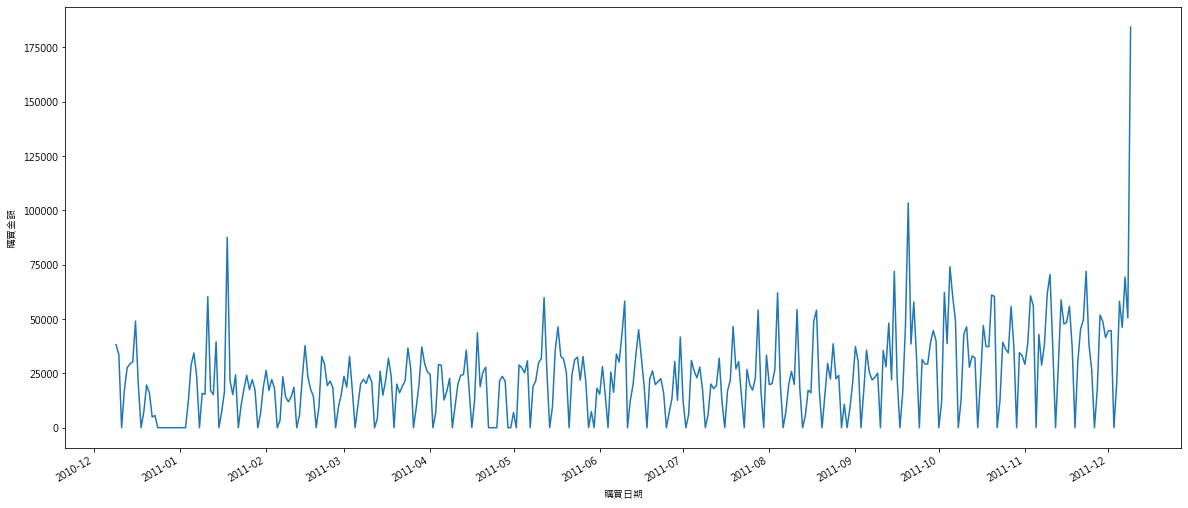

In [21]:
months = mdates.MonthLocator()  # every month

fig, ax = plt.subplots(figsize=(20,9))
chart = sns.lineplot(data=pur, x='PurchaseDate',y='PurchaseTotal')
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.set_xlabel('購買日期')
ax.set_ylabel('購買金額')

挑選2月到五月之間的日期，查看購買金額總數是否有周期變化？

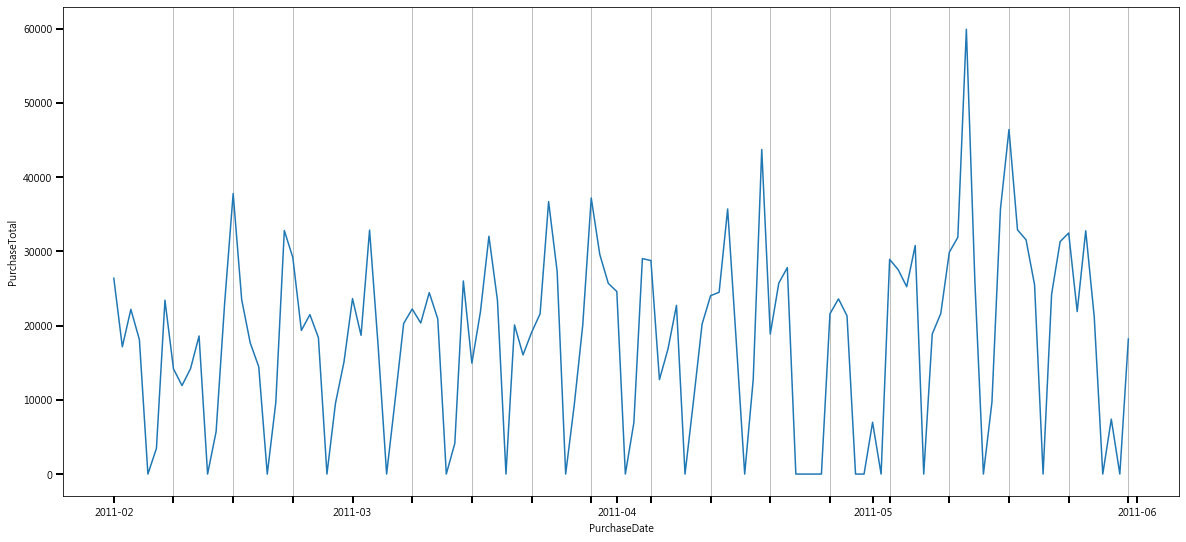

In [50]:
months = mdates.MonthLocator()  # every month
weeks = mdates.WeekdayLocator() # every week

fig, ax = plt.subplots(figsize=(20,9))
chart = sns.lineplot(data=pur.loc[pur.PurchaseDate.apply(lambda x: x>=date(2011, 2, 1) and x<=date(2011, 5, 31))], x='PurchaseDate',y='PurchaseTotal')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(weeks)

ax.xaxis.grid(True, which='minor')

ax.tick_params(which='both', width=2, length=7)


探討一週間的哪一天的購買金額總數最高

In [97]:
purchase_date = \
purchase_date.assign(Weekday=lambda x: x.PurchaseDate.apply(lambda x: x.strftime('%a')))

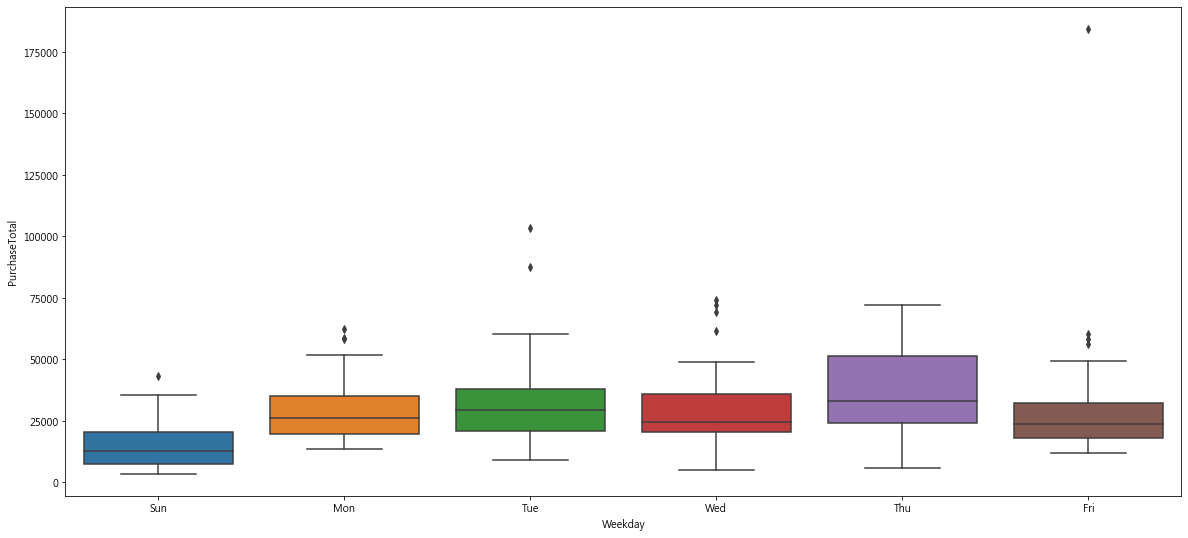

In [100]:
fig, ax = plt.subplots(figsize=(20,9))
chart = sns.boxplot(data=purchase_date, x='Weekday', y='PurchaseTotal',
                    order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

In [ ]:
探討一天每個時段的購買金額總數

In [113]:
hour_purchase = df_purchase.assign(PurchaseHour=lambda x: x.InvoiceDate.dt.hour)\
.assign(PurchaseTotal=lambda x: x.UnitPrice*x.Quantity)\
.groupby('PurchaseHour')\
.PurchaseTotal.sum()\
.reset_index()

hour_purchase

,PurchaseHour,PurchaseTotal
0,6,4.250
1,7,30592.210
2,8,278196.960
3,9,820238.221
4,10,1234346.171
5,11,1079427.370
6,12,1335843.280
7,13,1136096.420
8,14,974736.821
9,15,931281.500


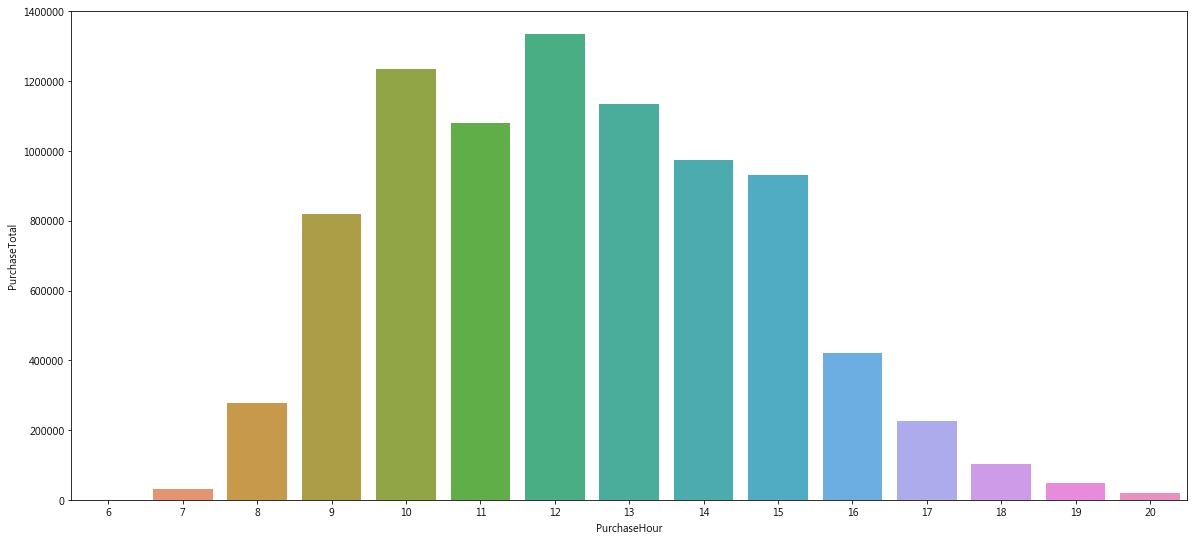

In [114]:
fig, ax = plt.subplots(figsize=(20,9))
chart = sns.barplot(data=hour_purchase, x='PurchaseHour', y='PurchaseTotal')

In [ ]:
每週各天的各時段購買金額

In [119]:
df_purchase.assign(PurchaseHour=lambda x: x.InvoiceDate.dt.hour)\
.assign(Weekday=lambda x: x.InvoiceDate.dt.strftime("%a"))\
.assign(PurchaseTotal=lambda x: x.UnitPrice*x.Quantity)\
.groupby('Weekday')\
.groupby('PurchaseHour')\
.PurchaseTotal.sum()

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [ ]:
依據購買金額排序商品

In [ ]:
依據取消金額排序商品